**Non-linear Spatial Filtering:** Order statistics filters
1. Median Filter
2. Max and min filters
3. mid-point filters
4. Alpha-trimmed filters

In [12]:
import cv2
import numpy as np
from scipy.ndimage import generic_filter

In [13]:
# load the image
img = cv2.imread("salterpepper.jpg",0)
# kernel size
kernel = 3

In [14]:
# median filter using in built methods
median_filtered = cv2.medianBlur(img, kernel)

In [15]:
# max filter using in-built methods
max_filtered = cv2.dilate(img, np.ones((kernel, kernel),np.uint8))

In [16]:
# min filter using in-built methods
min_filtered = cv2.erode(img, np.ones((kernel, kernel), np.uint8))

In [17]:
# mid-point filter using in-built methods
def mid_point(neighborhood):
    return (np.max(neighborhood) + np.min(neighborhood)) / 2

mid_point_filtered = generic_filter(img, mid_point, size=kernel)

In [18]:
def alpha_trimmed(neighborhood, alpha):
    sorted_neighborhood = np.sort(neighborhood)
    trimmed_neighborhood = sorted_neighborhood[alpha:-alpha]
    return np.mean(trimmed_neighborhood)

alpha = 1
alpha_trimmed_img = generic_filter(img, alpha_trimmed, size=kernel, extra_arguments=(alpha,))

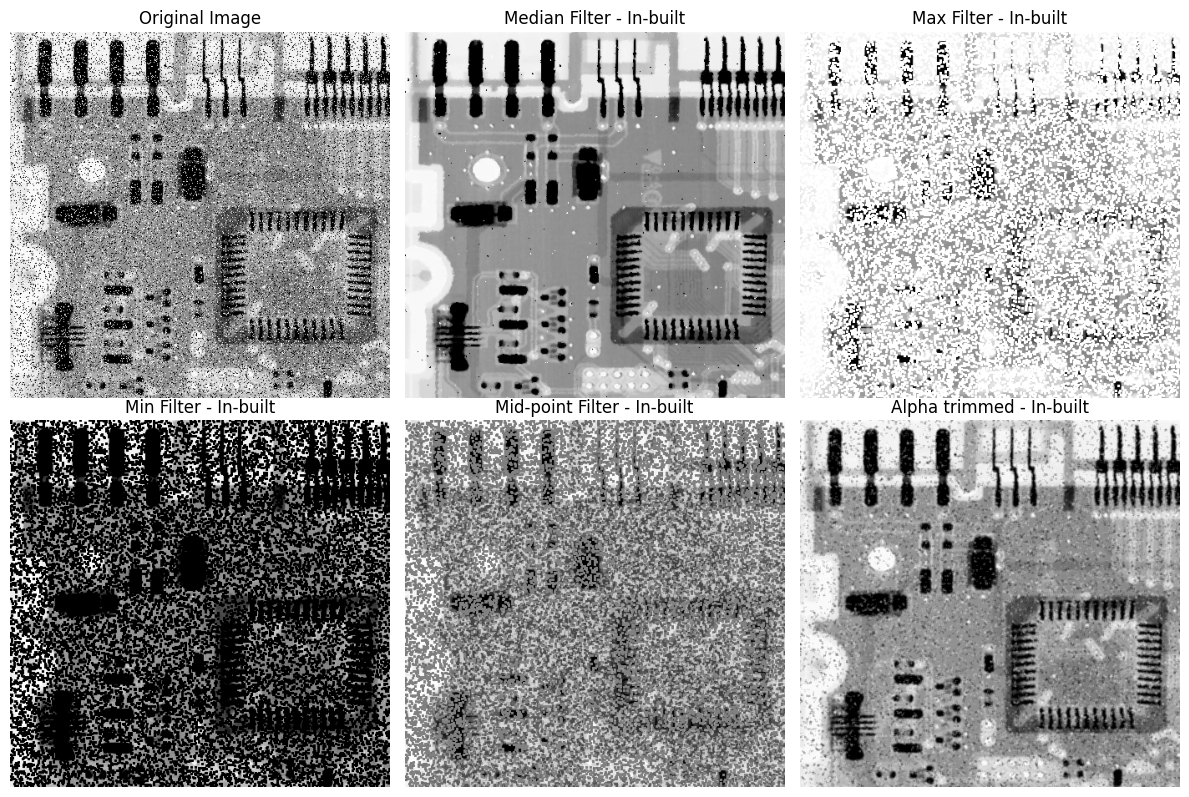

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Median Filter - In-built")
plt.imshow(median_filtered, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Max Filter - In-built")
plt.imshow(max_filtered, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Min Filter - In-built")
plt.imshow(min_filtered, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Mid-point Filter - In-built")
plt.imshow(mid_point_filtered, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Alpha trimmed - In-built")
plt.imshow(alpha_trimmed_img, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(pad_size, image.shape[0] + pad_size):
        for j in range(pad_size, image.shape[1] + pad_size):
            neighborhood = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            filtered_image[i - pad_size, j - pad_size] = np.median(neighborhood)
    return filtered_image

In [21]:
def max_filter(image, kernel_size):
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

In [22]:
def mid_point_filter(image, kernel_size):
    max_filtered = max_filter(image, kernel_size)
    min_filtered = min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

In [27]:
# User-defined alpha-trimmed filter function
def alpha_trimmed_filter(image, kernel_size, alpha):
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(pad_size, image.shape[0] + pad_size):
        for j in range(pad_size, image.shape[1] + pad_size):
            neighborhood = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            sorted_neighborhood = np.sort(neighborhood.flatten())
            trimmed_neighborhood = sorted_neighborhood[alpha:-alpha]
            filtered_image[i - pad_size, j - pad_size] = np.mean(trimmed_neighborhood)
    return filtered_image.astype(np.uint8)

In [30]:
# Apply filters
mf_img = median_filter(img, kernel)
mx_img = max_filter(img, kernel)
mn_img = min_filter(img, kernel)
md_img = mid_point_filter(img, kernel)
at_img = alpha_trimmed_filter(img, kernel, alpha=alpha)

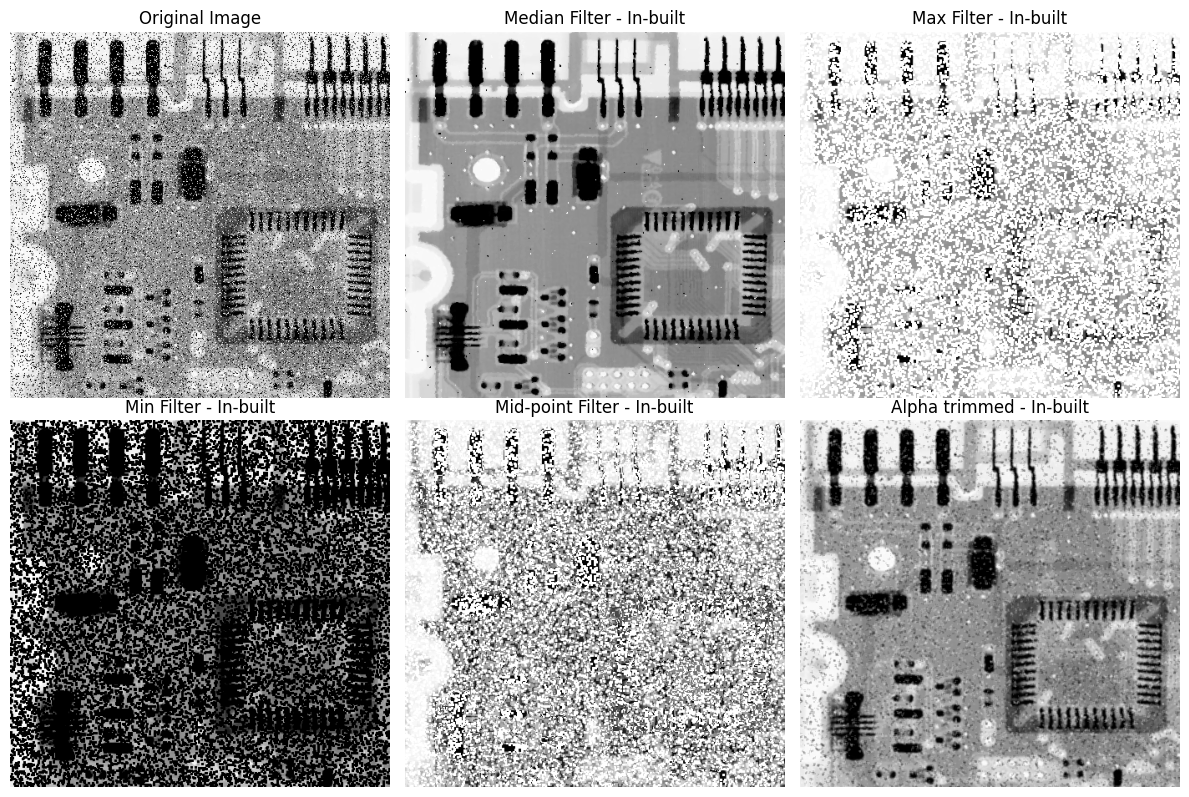

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Median Filter - In-built")
plt.imshow(mf_img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Max Filter - In-built")
plt.imshow(mx_img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Min Filter - In-built")
plt.imshow(mn_img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Mid-point Filter - In-built")
plt.imshow(md_img, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Alpha trimmed - In-built")
plt.imshow(at_img, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()